In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [2]:
def evaluate_model(y_true, y_pred, dataset_name):
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2_score = 1 - rss / tss

    print(f"\n=== {dataset_name.upper()} SET PERFORMANCE ===")
    print(f"MSE: {rss / len(y_true):.4f}")
    print(f"RSS: {rss:.2f}")
    print(f"TSS: {tss:.2f}")
    print(f"R²: {r2_score:.4f}")

    return r2_score


[13360. -4720.]
Linear fit: y = -4720.00x + 13360.00
R^2 score is: 0.95


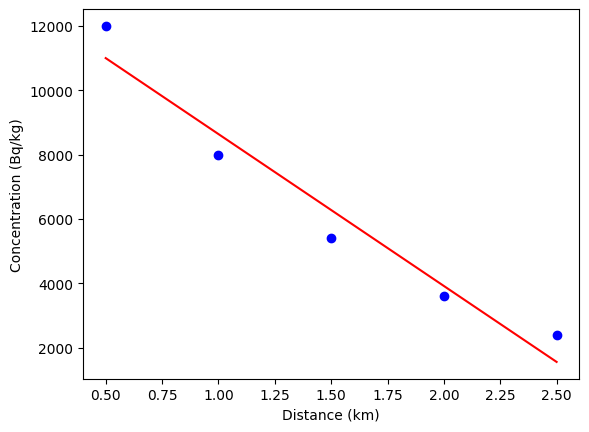

In [3]:
# Q1.1 Linear Model

# Data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([12000, 8000, 5400, 3600, 2400])

# Linear Regression
M = np.column_stack([np.ones_like(x), x])

# print(M)
# print(M.T @ M)
# print(np.linalg.inv(M.T @ M))
# print(np.linalg.inv(M.T @ M) @ M.T)

a = np.linalg.inv(M.T @ M) @ M.T @ y

print(a)

# a = np.linalg.lstsq(M, y)[0]

# a = np.polyfit(x, y, 1)

# Prediction
y_pred = M @ a

# y_pred = np.polyval(a, x)

print(f"Linear fit: y = {a[1]:.2f}x + {a[0]:.2f}")

print(f"R^2 score is: {r2_score(y, y_pred):.2f}")

# Plot
plt.scatter(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Concentration (Bq/kg)")
plt.show()


Exponential fit: y = 17933.04 * 0.45^x
R^2 score is: 1.00


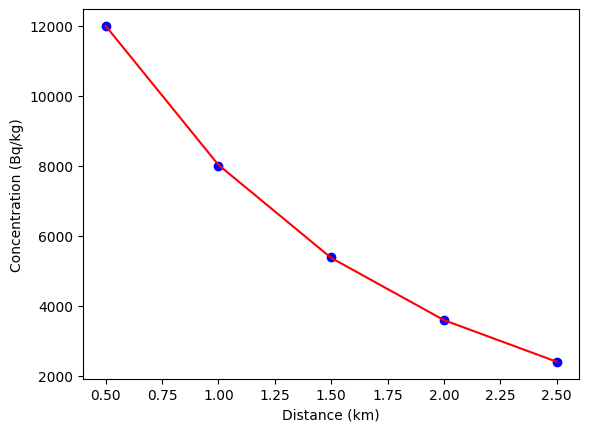

In [4]:
# Q1.2 Exponential Model

# Data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5])
y = np.array([12000, 8000, 5400, 3600, 2400])

# x_log = np.log(x)
y_log = np.log(y)

# print(x_log)
# print(y_log)

# Exponential Regression
M = np.column_stack([np.ones_like(x), x])

coefs = np.linalg.inv(M.T @ M) @ M.T @ y_log

a = np.exp(coefs[0])
b = np.exp(coefs[1])

y_pred = a * b ** x


# print(M.T @ M)
# print(np.linalg.inv(M.T @ M))
# print(M.T @ y_log)
# print(coefs)
# print(a)
# print(b)

print(f"Exponential fit: y = {a:.2f} * {b:.2f}^x")

print(f"R^2 score is: {r2_score(y, y_pred):.2f}")

# plt.scatter(x_log, y_log, color="blue")
# plt.plot(x_log, y_pred, color="red")
plt.scatter(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Concentration (Bq/kg)")
plt.show()

In [5]:
# Q2 Multiple Linear Regression

x1 = np.array([80, 100, 120, 90])
x2 = np.array([5, 10, 2, 8])
x3 = np.array([3.0, 5.0, 2.0, 4.0])
y = np.array([6000, 6500, 8000, 6200])

# Step 1: Standardize the data
x1_std = (x1 - np.mean(x1)) / np.std(x1)
x2_std = (x2 - np.mean(x2)) / np.std(x2)
x3_std = (x3 - np.mean(x3)) / np.std(x3)
# y_std = (y - np.mean(y)) / np.std(y)

# print(np.std(x1))
# print(x1_std)

# print(np.std(x2))
# print(x2_std)

# print(np.std(x3))
# print(x3_std)

# print(np.std(y))
# print(y_std)

# print(np.std(x1_std))

# Step 2: Create the design matrix
M = np.column_stack([np.ones_like(x1_std), x1_std, x2_std, x3_std])
# print(M)

# Step 3: Calculate the coefficients using Ridge Regression
lambda_reg = 1
n_features = M.shape[1]  # This will be 4 (intercept + 3 features)
coefs = np.linalg.inv(M.T @ M + lambda_reg * np.eye(n_features)) @ M.T @ y

# print(M.T @ y)
# print(M.T @ M + lambda_reg * np.eye(n_features))
# print(np.linalg.inv(M.T @ M + lambda_reg * np.eye(n_features)))

print(f"Intercept (c0): {coefs[0]:.4f}")
for i in range(1, len(coefs)):
    print(f"c{i} (X{i}): {coefs[i]:.4f}")

# Step 4: Prediction
y_pred = M @ coefs

# print(f"\nPredictions: {y_pred}")
# print(f"Residuals: {y - y_pred}")
print(f"R^2 score is: {r2_score(y, y_pred):.2f}")


Intercept (c0): 5340.0000
c1 (X1): 521.2943
c2 (X2): -145.0227
c3 (X3): -111.4355
R^2 score is: -1.92


In [6]:
# Q5

from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as numpy array)
X = np.array(real_estate_valuation.data.features)
y = np.array(real_estate_valuation.data.targets)

# print(X)
# print(y)

training_set = X[:331]
testing_set = X[331:]

y_training_set = y[:331].flatten()
y_testing_set = y[331:].flatten()

# metadata
# print(real_estate_valuation.metadata)

# variable information
# print(real_estate_valuation.variables)

In [7]:
# Step 1: Prepare training set and testing set
y_log_training_set = np.log(y_training_set)
y_log_testing_set = np.log(y_testing_set)
# print(y_log_training_set)
# print(y_log_testing_set)

# Step 2: Extract X3 for both sets
x3_training_set = training_set[:, 2]
x3_testing_set = testing_set[:, 2]
# print(x3_training_set)

# Step 3: Train model on training set
M = np.column_stack([np.ones_like(x3_training_set), x3_training_set])
coefs = np.linalg.inv(M.T @ M) @ M.T @ y_log_training_set
# print(coefs)

a = np.exp(coefs[0])
b = coefs[1]

print(f"a: {a:.6f}")
print(f"b: {b:.6f}")

print(f"Exponential fit: y = {a:.6f} * e^({b:.6f}x)")

# Step 4: Evaluation on model's performance
y_pred_train = a * np.exp(b * x3_training_set)
y_pred_test = a * np.exp(b * x3_testing_set)

r2_train = evaluate_model(y_training_set, y_pred_train, "training")
r2_test = evaluate_model(y_testing_set, y_pred_test, "testing")


a: 45.356713
b: -0.000234
Exponential fit: y = 45.356713 * e^(-0.000234x)

=== TRAINING SET PERFORMANCE ===
MSE: 102.0129
RSS: 33766.28
TSS: 63821.16
R²: 0.4709

=== TESTING SET PERFORMANCE ===
MSE: 65.5353
RSS: 5439.43
TSS: 12628.53
R²: 0.5693


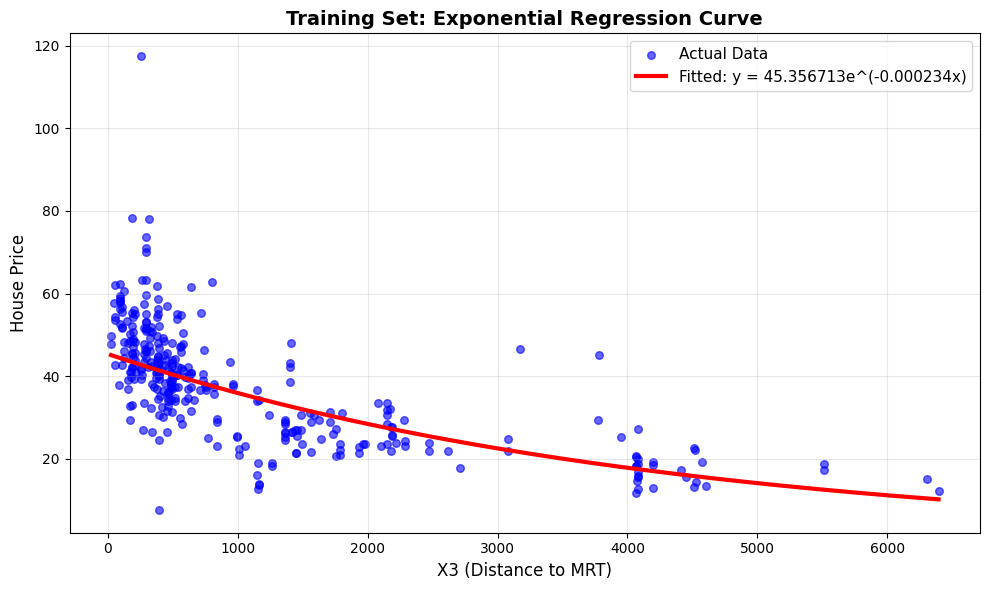

In [8]:
# Single plot: Training Set with Fitted Exponential Curve
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(
    x3_training_set, y_training_set, alpha=0.6, color="blue", s=30, label="Actual Data"
)

# Create smooth curve for fitted line
x_smooth = np.linspace(x3_training_set.min(), x3_training_set.max(), 300)
y_smooth = a * np.exp(b * x_smooth)
plt.plot(
    x_smooth, y_smooth, "r-", linewidth=3, label=f"Fitted: y = {a:.6f}e^({b:.6f}x)"
)

plt.xlabel("X3 (Distance to MRT)", fontsize=12)
plt.ylabel("House Price", fontsize=12)
plt.title("Training Set: Exponential Regression Curve", fontsize=14, fontweight="bold")
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
# Model 2: Multiple Linear Regression Model

# Step 1: Create design matrix
M_train = np.column_stack([np.ones(training_set.shape[0]), training_set])
# print(f"Design matrix shape: {M_train.shape}")
M_test = np.column_stack([np.ones(testing_set.shape[0]), testing_set])

# Step 2: Train multiple linear regression model
coefs = np.linalg.inv(M_train.T @ M_train) @ M_train.T @ y_training_set

# print(f"Coefficients shape: {coefs.shape}")
print(f"Intercept (c0): {coefs[0]:.4f}")
for i in range(1, len(coefs)):
    print(f"c{i} (X{i}): {coefs[i]:.4f}")

# Step 3: Evaluate model performance
y_pred_train = M_train @ coefs
y_pred_test = M_test @ coefs

r2_train = evaluate_model(y_training_set, y_pred_train, "training")
r2_test = evaluate_model(y_testing_set, y_pred_test, "testing")

Intercept (c0): -15600.9758
c1 (X1): 5.1445
c2 (X2): -0.2868
c3 (X3): -0.0042
c4 (X4): 1.1780
c5 (X5): 249.5309
c6 (X6): -7.7633

=== TRAINING SET PERFORMANCE ===
MSE: 81.7156
RSS: 27047.88
TSS: 63821.16
R²: 0.5762

=== TESTING SET PERFORMANCE ===
MSE: 59.4092
RSS: 4930.97
TSS: 12628.53
R²: 0.6095


In [10]:
# Model 3: Multiple Linear Regression Model with L2 regularization

# Step 1: Create design matrix
M_train = np.column_stack([np.ones(training_set.shape[0]), training_set])
# print(f"Design matrix shape: {M_train.shape}")
M_test = np.column_stack([np.ones(testing_set.shape[0]), testing_set])

# Step 2: Train multiple linear regression model with L2 regularization
lambda_reg = 0.03
n_features = M_train.shape[1]
coefs = np.linalg.inv(M_train.T @ M_train + lambda_reg * np.eye(n_features)) @ M_train.T @ y_training_set

print(f"Intercept (c0): {coefs[0]:.4f}")
for i in range(1, len(coefs)):
    print(f"c{i} (X{i}): {coefs[i]:.4f}")

# Step 3: Evaluate model performance
y_pred_train = M_train @ coefs
y_pred_test = M_test @ coefs

r2_train = evaluate_model(y_training_set, y_pred_train, "training")
r2_test = evaluate_model(y_testing_set, y_pred_test, "testing")

Intercept (c0): -0.9899
c1 (X1): 3.1770
c2 (X2): -0.2829
c3 (X3): -0.0055
c4 (X4): 1.2440
c5 (X5): 117.0548
c6 (X6): -76.3055

=== TRAINING SET PERFORMANCE ===
MSE: 84.0472
RSS: 27819.62
TSS: 63821.16
R²: 0.5641

=== TESTING SET PERFORMANCE ===
MSE: 58.5481
RSS: 4859.49
TSS: 12628.53
R²: 0.6152
